In [196]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, optimizers, regularizers
from tensorflow.keras.layers import Flatten , Activation
from tensorflow.keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import time
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import StratifiedKFold

#tf.config.experimental.set_visible_devices([], 'GPU')

#NAME ="Excel model-{}".format(int(time.time()))

#tensorboard=TensorBoard(log_dir='logs/{}'.format(NAME))
import keras.backend.tensorflow_backend as tfback

def _get_available_gpus():
    """Get a list of available gpu devices (formatted as strings).
    # Source of this function: https://github.com/keras-team/keras/issues/13684
    # Returns
        A list of available GPU devices.
    """
    #global _LOCAL_DEVICES
    if tfback._LOCAL_DEVICES is None:
        devices = tf.config.list_logical_devices()
        tfback._LOCAL_DEVICES = [x.name for x in devices]
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]


gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[1], True)
tf.config.set_visible_devices(gpus[1], 'GPU')

tfback._get_available_gpus = _get_available_gpus
print(_get_available_gpus())
    
                               

df =pd.read_csv('Training.csv')

df = df.replace(-999, 0)
df = df.dropna()
df.shape
df_droped = df.drop(['EventId', 'Weight','DER_mass_MMC'], axis=1)
df_droped['Label'] = df_droped['Label'].apply({'s':1, 'b':0}.get)
X_train, X_test, y_train, y_test = train_test_split(df_droped.drop(['Label'], axis=1), df_droped['Label'], test_size=0.2,random_state=0)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




model = Sequential()

model.add(Flatten())


#model.add(Dense(500))
#model.add(Activation("relu")) 

#model.add(Dense(500))
#model.add(Activation("relu"))

#model.add(Dense(500))
#model.add(Activation("relu"))



#model.add(Dense(500))
#model.add(Activation('relu')) 

#model.add(Dense(500))
#model.add(Activation('relu')) 

#model.add(Dense(500))
#model.add(Activation('relu')) 

model.add(Dense(30))
model.add(Activation('relu')) 

model.add(Dense(30))
model.add(Activation("relu"))


          
          
#model.add(Dense(100))
#model.add(Activation('relu'))          
          

# Add an output layer 
model.add(Dense(1))
model.add(Activation('sigmoid'))

# define Parameters for the training of the model
# Good default optimizer to start with , how will we calculate our "error." Neural network aims to minimize loss.


model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

print(X_train.shape)



model.fit(X_train,y_train, epochs=1 ,batch_size=32)



          
          
val_loss, val_acc = model.evaluate(X_test, y_test) # evaluate the out of sample data with model
print("test loss=",val_loss) #model's loss
print("test acc =",val_acc)  #model's accuracy   


y_pred=model.predict(X_test)
#y_pred= np.delete(y_pred, np.s_[-1:], axis=1)
y_pred=(y_pred>0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) #confusion matrix is not working with continious probability values
print(cm)

sensitivity=cm[1,1]/(cm[1,1]+cm[1,0]) 
specificity=cm[0,0]/(cm[0,0]+cm[0,1]) 
print("sesnsetivity =",sensitivity)
print( "specificity =",specificity)






    




['/device:GPU:0']
(200000, 29)
Train on 200000 samples
50000/50000 [==============================] - 4s 76us/sample - loss: 0.3861 - accuracy: 0.8266
test loss= 0.386053294801712
test acc = 0.82664
[[30482  2389]
 [ 6279 10850]]
sesnsetivity = 0.63342868818962
specificity = 0.9273219555231055


In [197]:
print(type(y_test))
print(type(y_pred))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [198]:
y_pred=model.predict(X_test)
#y_pred= np.delete(y_pred, np.s_[-1:], axis=1)
y_pred=y_pred>0.5
y_pred=y_pred*1
print(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) #confusion matrix is not working with continious probability values
print(cm)

sensitivity=cm[1,1]/(cm[1,1]+cm[1,0]) 
specificity=cm[0,0]/(cm[0,0]+cm[0,1]) 
print("sesnsetivity =",sensitivity)
print( "specificity =",specificity)
print(type(y_pred))

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]
[[30482  2389]
 [ 6279 10850]]
sesnsetivity = 0.63342868818962
specificity = 0.9273219555231055
<class 'numpy.ndarray'>


In [229]:
df['Label'] = df['Label'].apply({'s':1, 'b':0}.get)
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Label'], axis=1), df['Label'], test_size=0.2,random_state=0)
X_test=X_test.drop(['EventId',  'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight'],axis=1)

X_test = X_test.to_numpy()
X_test =X_test.flatten()
y_pred=y_pred.flatten()
y_test=y_test*1
y_pred=y_pred*1
y_test = y_test.to_numpy()
y_test


array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [227]:
T = pd.DataFrame(X_test, y_test)
P = pd.DataFrame(X_test, y_pred)



HiggsP = P.replace(0, np.nan)
HiggsP = HiggsP.dropna()
HiggsP.head()
HiggsT = T.replace(0, np.nan)
HiggsT = HiggsT.dropna()


ZP = P.replace(1, np.nan)
ZP = ZP.dropna()
ZP.head()
ZT = T.replace(1, np.nan)
ZT = ZT.dropna()
ZT.head()
print(HiggsT)
print(HiggsP)
print(ZT)
print(ZP)

          0
1   128.224
0   103.989
1   164.803
0    87.733
0    81.469
..      ...
1   124.341
1   105.506
1   104.864
1   111.563
0    51.309

[42375 rows x 1 columns]
          0
0   128.224
0   103.989
1   164.803
0    87.733
0    81.469
..      ...
0   124.341
1   105.506
1   104.864
1   111.563
0    51.309

[42375 rows x 1 columns]
          0
1   128.224
0     0.000
0   103.989
1   164.803
0    87.733
..      ...
1   105.506
0     0.000
1   104.864
1   111.563
0    51.309

[50000 rows x 1 columns]
          0
0   128.224
0     0.000
0   103.989
1   164.803
0    87.733
..      ...
1   105.506
0     0.000
1   104.864
1   111.563
0    51.309

[50000 rows x 1 columns]


ValueError: cannot copy sequence with size 42375 to array axis with dimension 1

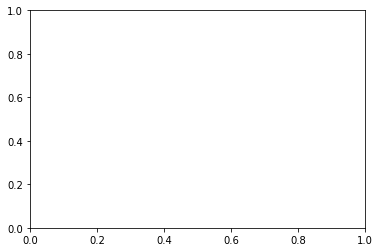

In [228]:
plt.hist([HiggsP,HiggsT, ZP,ZT], bins=100,
         label=['Higgs Pred', 'Higgs test','Z Pred','Z test'],
         alpha=0.7,color=['black','red','green','skyblue']
        )
         
         
        
        
plt.xlabel("DER MASS MMC")
plt.ylabel("Events")
plt.legend(loc='upper right')
plt.title('Actual vs Predicted Mass')
plt.ylim(ymax=4000)
plt.xlim(xmin =0,xmax=600)
plt.show()

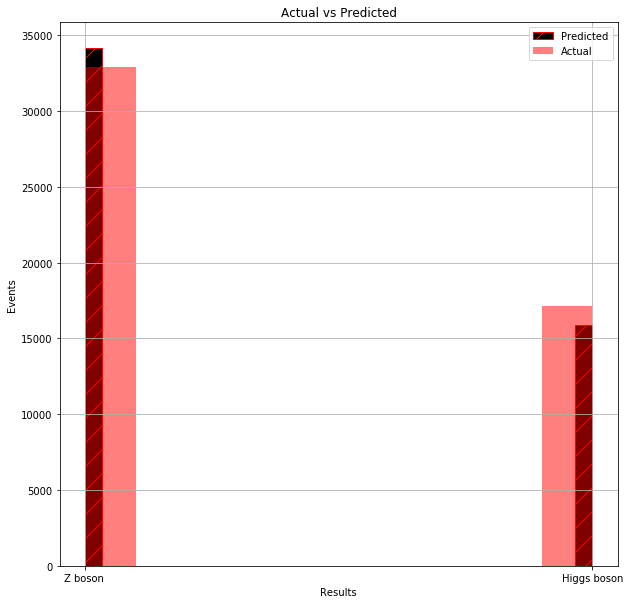

In [174]:
N=2
ind=np.arange(N)



#higgs=1*higgs

plt.figure(figsize=(10,10))

n, bins, patches = plt.hist(x=(y_pred), bins=30,color='black',rwidth=1 , edgecolor = 'red', hatch = '/', label = 'Predicted')
_ = plt.hist(y_test,alpha=0.5,color='red',label='Actual')
plt.xlabel( "Results")
plt.ylabel("Events")

plt.xticks(ind, ('Z boson ', 'Higgs boson'))

plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)



plt.show()


(0, 800)

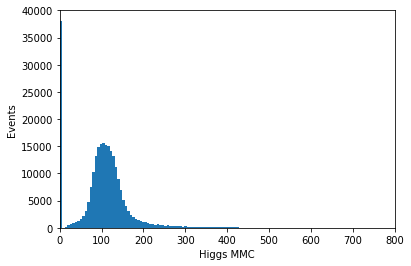

In [175]:
n, bins, patches = plt.hist(x=df['DER_mass_MMC'], bins=200)
plt.xlabel("Higgs MMC")
plt.ylabel("Events")
plt.ylim(ymax=40000)
plt.xlim(xmin =0,xmax=800)

In [176]:
df =pd.read_csv('Training.csv')

df = df.replace(-999, 0)
df = df.dropna()
df.shape
df_droped = df.drop(['EventId', 'Weight'], axis=1)
df_droped['Label'] = df_droped['Label'].apply({'s':1, 'b':0}.get)
#X_train, X_test, y_train, y_test = train_test_split(df_droped.drop(['Label'], axis=1), df_droped['Label'], test_size=0.2)

'''
MMC_test=X_test.drop(['DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       ],axis=1)'''
MMC_Label=df.drop(['DER_mass_transverse_met_lep','EventId',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt','Weight'
       ],axis=1)
Yt = pd.Series(y_test , name='Label')
Yt.head()
MMC_Label['Label'] = MMC_Label['Label'].apply({'s':1, 'b':0}.get)
#frames = [MMC_test,y_test]
#result = pd.concat(frames)

#MMC_test.merge(pd.DataFrame(data = [y_test.values] * len(y_test), columns = y_test.index), left_index=True)

Mt=pd.concat([MMC_test, Yt], axis=1)

y_pred.flatten()

Yp = pd.Series(y_pred , name='Label')
Yp.head()

Mp=pd.concat([MMC_test, Yp],join="inner", axis=1)
#Mp=pd.concat([MMC_test, Yt], keys=['s1', 's2'],
          #names=['Series name', 'Row ID'])


y_test

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [132]:
HiggsP = Mp.replace(0, np.nan)
HiggsP = HiggsP.dropna()
HiggsP.head()
HiggsT = Mt.replace(0, np.nan)
HiggsT = HiggsT.dropna()


ZP = Mp.replace(1, np.nan)
ZP = ZP.dropna()
ZP.head()
ZT = Mt.replace(1, np.nan)
ZT = ZT.dropna()
ZT.head()
print(HiggsT)
print(HiggsP)
print(ZT)
print(ZP)

        DER_mass_MMC  Label
232555       121.048    1.0
208244       185.549    1.0
206128       102.182    1.0
61115        118.055    1.0
41730        100.839    1.0
...              ...    ...
193302       121.121    1.0
182256        84.711    1.0
211239       112.970    1.0
166399        97.955    1.0
27025        122.219    1.0

[16548 rows x 2 columns]
       DER_mass_MMC  Label
41730       100.839    1.0
18320       142.226    1.0
30581       127.299    1.0
25550        55.058    1.0
26298       106.693    1.0
...             ...    ...
6562        122.857    1.0
21476       125.955    1.0
46674        97.487    1.0
31598       112.565    1.0
39511       178.153    1.0

[2834 rows x 2 columns]
        DER_mass_MMC  Label
188020        80.702    0.0
52550          0.000    0.0
99990          0.000    0.0
233419        74.322    0.0
93036         40.445    0.0
...              ...    ...
16714        108.777    0.0
246072       104.141    0.0
187986         0.000    0.0
58087    

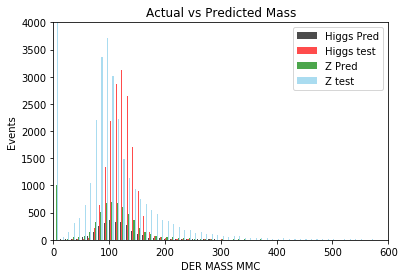

In [129]:
plt.hist([HiggsP['DER_mass_MMC'],HiggsT['DER_mass_MMC'], ZP['DER_mass_MMC'],ZT['DER_mass_MMC']],bins=100,
         label=['Higgs Pred', 'Higgs test','Z Pred','Z test'],
         alpha=0.7,color=['black','red','green','skyblue']
         
         
         
        
        )
plt.xlabel("DER MASS MMC")
plt.ylabel("Events")
plt.legend(loc='upper right')
plt.title('Actual vs Predicted Mass')
plt.ylim(ymax=4000)
plt.xlim(xmin =0,xmax=600)
plt.show()

In [ ]:
n, bins, patches = plt.hist(x=df['DER_mass_MMC'], bins='auto')
plt.xlabel("Higgs MMC")
plt.ylabel("Events")
#plt.ylim(ymax=8000)
#plt.xlim(xmin =0,xmax=800)

# Useful Plots Templates

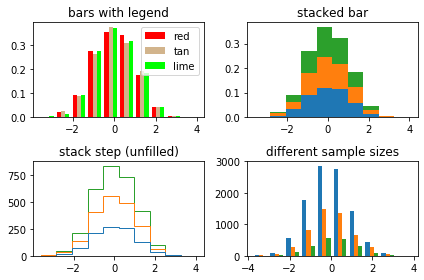

In [38]:
np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()



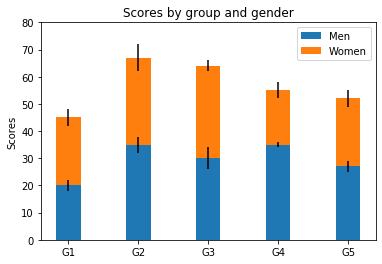

In [44]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()


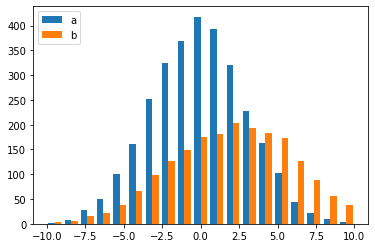

In [75]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.normal(0, 3, 3000)
b = np.random.normal(2, 4, 2000)

bins = np.linspace(-10, 10, 20)

plt.hist([a, b], bins, label=['a', 'b'])
plt.legend(loc='upper left')
plt.show()

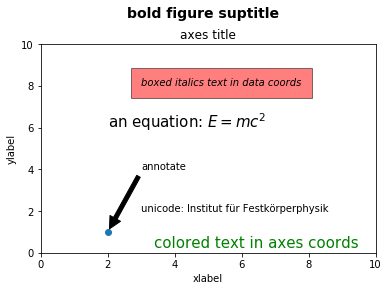

In [76]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)

ax.text(3, 2, 'unicode: Institut für Festkörperphysik')

ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)


ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.axis([0, 10, 0, 10])

plt.show()

In [94]:

import matplotlib
>>> matplotlib.__version__


'3.1.3'

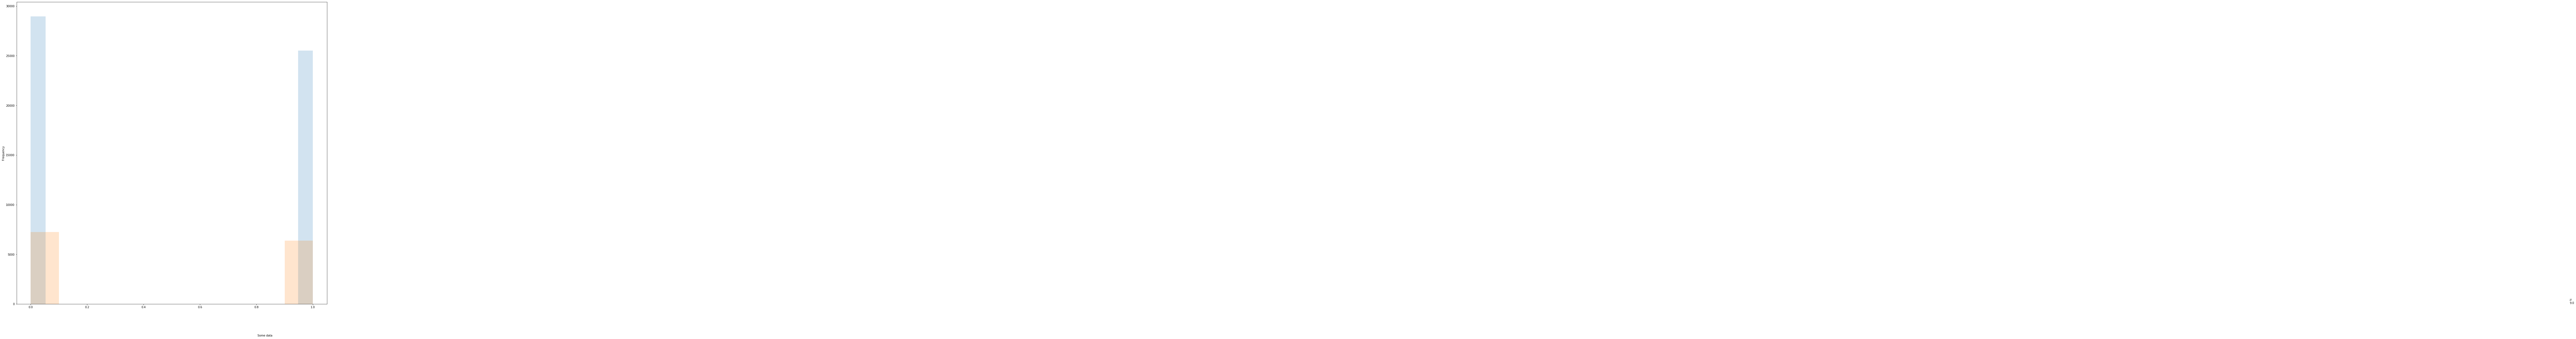

In [104]:
import matplotlib.pyplot as plt
import numpy as np


a = np.array([10, 10, 10, 8, 9, 9, 7])

mean = np.mean(a)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)

plt.hist(y_train, alpha=0.2,bins='auto')
plt.hist(y_test, alpha=0.2)

ax.set_ylabel(u'Frequency')
ax.set_xlabel(u'Some data')
ax.xaxis.set_label_coords(0.8, -0.1)

ax.text(mean, 0, '$\mu$\n{}'.format(mean))

plt.show()